# Minimum Daily Temperatures Dataset


In [53]:
import pandas as pd
import matplotlib.pylab as plt

In [54]:
series = pd.read_csv('/home/garvit/Datasets/daily-min-temperatures.csv', header=0, index_col=0)
series.head(4)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6


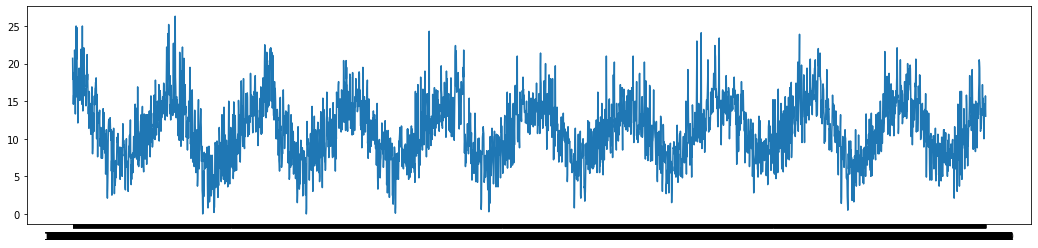

In [16]:
plt.figure(figsize=(18,4))
plt.plot(series['Temp'])
plt.show()

## Checking Autocorrelation

#### Using Pandas *lag_plot()* function

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

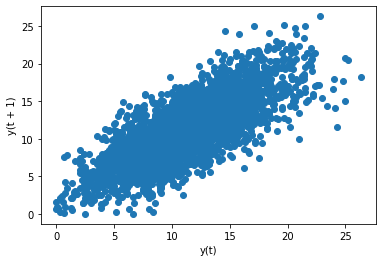

In [55]:
from pandas.plotting import lag_plot
lag_plot(series)

#### Checking manually 

In [19]:
t = series['Temp'] # original series
t_1 = series['Temp'].shift(1) # lag_1 series

print("correlation between t and t-1: ",t.corr(t_1))

correlation between t and t-1:  0.7748702165384458


## Autocorrelation Plots 
(for multiple lags)


#### Using Pandas *autocorrelation_plot()* 

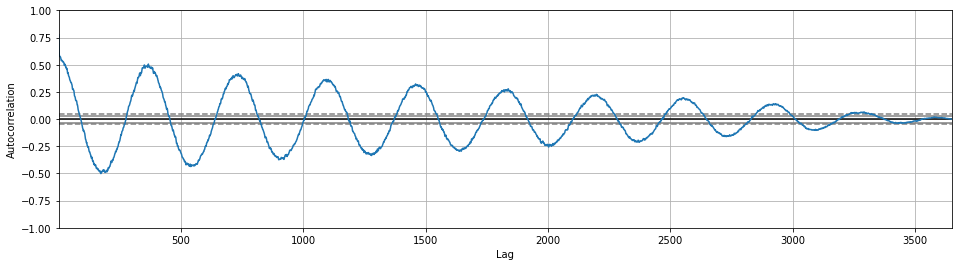

In [23]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(16,4))
autocorrelation_plot(series)
plt.show()

#### using Statsmodels *acf_plot()*

<Figure size 1152x360 with 0 Axes>

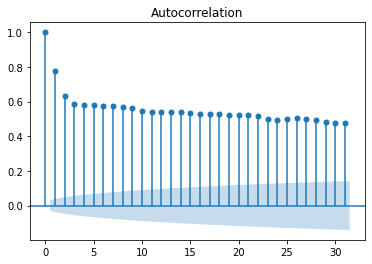

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(16,5))
plot_acf(series, lags=31)
plt.show()

## Autoregression Model


In [26]:
3650-7

3643

In [31]:
test

array([[12.9],
       [14.6],
       [14. ],
       [13.6],
       [13.5],
       [15.7],
       [13. ]])

In [78]:
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
from sklearn.metrics import mean_squared_error


train = series.iloc[:3642,:].values
test = series.iloc[3643:,:].values

# train Auto-Regression
model = AutoReg(train, lags=29)
model_fit = model.fit()

# making predictions
predictions = model_fit.predict(start= len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=14.207772, expected=12.900000
predicted=14.355563, expected=14.600000
predicted=14.145536, expected=14.000000
predicted=14.154498, expected=13.600000
predicted=13.796117, expected=13.500000
predicted=13.675335, expected=15.700000
predicted=13.716943, expected=13.000000
Test RMSE: 0.986


Plot results

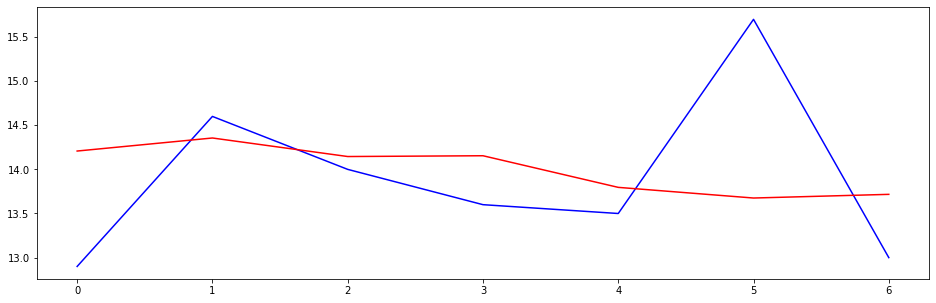

In [79]:
plt.figure(figsize=(16,5))
# plt.plot(train, color='blue')
plt.plot(test, 'blue')
plt.plot(predictions, color='red')
plt.show()
